# Instrumental Variables

In [ ]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import statistics
import statsmodels.formula.api as smf

##### The data in injury was used to study the length of time (in weeks) that an injured worker receives workers’ compensation.

In [2]:
# The control group is low-income workers, and the treatment group is high-income workers. 
# Include controls for gender, marital status, age, and type of injury.

### Estimate the treatment effect on log(durat) and highearn as the dummy variable for high earners

In [10]:
#import data
import wooldridge as woo 
injury = woo.data('injury') 
injury.head()

,durat,afchnge,highearn,male,married,hosp,indust,injtype,age,prewage,...,head,neck,upextr,trunk,lowback,lowextr,occdis,manuf,construc,highlpre
0,1.0,1,1,1.0,0.0,1,3.0,1,26.0,404.950012,...,1,0,0,0,0,0,0,0.0,0.0,6.003764
1,1.0,1,1,1.0,1.0,0,3.0,1,31.0,643.825012,...,1,0,0,0,0,0,0,0.0,0.0,6.467427
2,84.0,1,1,1.0,1.0,1,3.0,1,37.0,398.125000,...,1,0,0,0,0,0,0,0.0,0.0,5.986766
3,4.0,1,1,1.0,1.0,1,3.0,1,31.0,527.799988,...,1,0,0,0,0,0,0,0.0,0.0,6.268717
4,1.0,1,1,1.0,1.0,0,3.0,1,23.0,528.937500,...,1,0,0,0,0,0,0,0.0,0.0,6.270870


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ldurat   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     34.66
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           4.06e-35
Time:                        18:25:25   Log-Likelihood:                -11434.
No. Observations:                6844   AIC:                         2.288e+04
Df Residuals:                    6838   BIC:                         2.292e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7352      0.073     10.067      0.000       0.592       0.878
highearn       0.2544      0.036      7.122      0.000       0.184       0.324
male          -0.0331      0.041     -0.811      0.418      -0.113       0.047
married        0.0543      0.036      1.492      0.136      -0.017       0.126
age            0.0095      0.001      7.221      0.000       0.007       0.012
injtype        0.0351      0.010      3.422      0.001       0.015       0.055
==============================================================================
Omnibus:                       54.082   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.069
Skew:                           0.039   Prob(JB):                     9.16e-19
Kurtosis:                       3.534   Cond. No.                         184.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

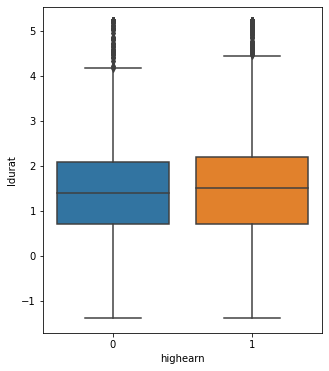

In [11]:
plt.figure(figsize=(5,6))
sns.boxplot(y = "ldurat", x = "highearn", data = injury)

treat1 = smf.ols('ldurat ~ highearn + male + married + age + injtype', injury).fit()
treat1.summary()

The treatment effect is the coefficient on the predictor, which is 0.2544.

### Test whether assignment to the treatment groups is random.

In [12]:
# Treatment group on other regressors:
test1 = smf.ols('highearn ~ male + married + age + injtype', injury).fit()
test1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               highearn   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     441.0
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:30:16   Log-Likelihood:                -4020.9
No. Observations:                6844   AIC:                             8052.
Df Residuals:                    6839   BIC:                             8086.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3063      0.024    -12.532      0.000      -0.354      -0.258
male           0.4083      0.013     31.668      0.000       0.383       0.434
married        0.2300      0.012     19.182      0.000       0.206       0.253
age            0.0052      0.000     11.800      0.000       0.004       0.006
injtype        0.0092      0.003      2.653      0.008       0.002       0.016
==============================================================================
Omnibus:                    13255.020   Durbin-Watson:                   0.336
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              481.965
Skew:                           0.139   Prob(JB):                    2.20e-105
Kurtosis:                       1.730   Cond. No.                         179.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The F-statistic is significant because its p-value is 0.00. Therefore there is likely not random assignment.

### Use difference-in-differences analysis to estimate the treatment effect. 

In [3]:
# On July 15, 1980, Kentucky raised the cap on weekly earnings that were covered by workers’ compensation. 
# An increase in the cap has no effect on the benefit for low-income workers, but it makes it less costly for a high-income worker to stay on workers’ compensation. 
# Let afchnge be the dummy variable for observations after the policy change.

<Figure size 1080x720 with 0 Axes>

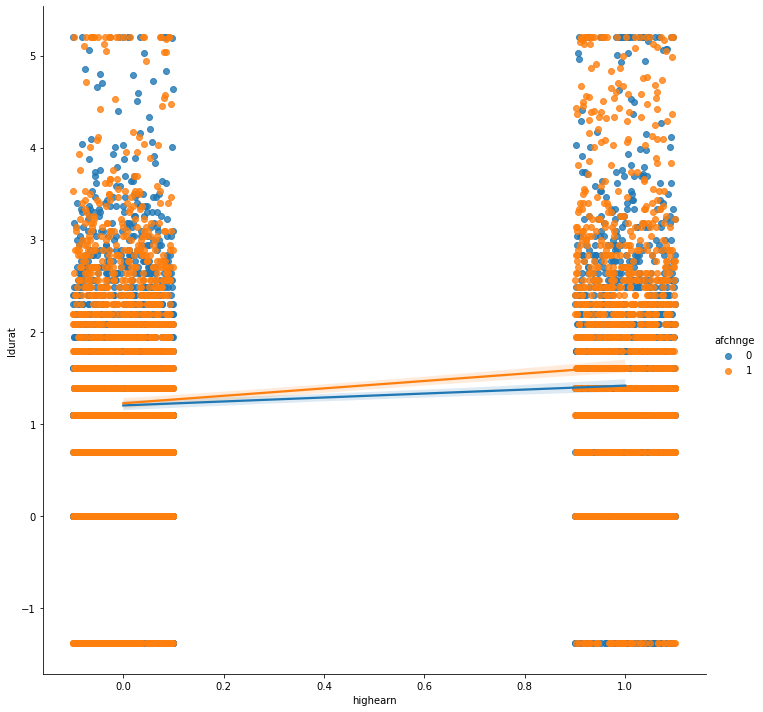

In [13]:
plt.figure(figsize = (15, 10))
sns.lmplot(x = "highearn", y = "ldurat", hue = "afchnge",data = injury, height = 10, x_jitter = .1) 

In [14]:
mod1 = smf.ols('ldurat ~ highearn*afchnge', injury).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ldurat   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     38.34
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           1.42e-24
Time:                        19:17:15   Log-Likelihood:                -12011.
No. Observations:                7150   AIC:                         2.403e+04
Df Residuals:                    7146   BIC:                         2.406e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1993      0.027     44.241      0.000       1.146       1.252
highearn             0.2152      0.043      4.963      0.000       0.130       0.300
afchnge              0.0236      0.040      0.595      0.552      -0.054       0.101
highearn:afchnge     0.1883      0.063      2.999      0.003       0.065       0.311
==============================================================================
Omnibus:                       61.563   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.572
Skew:                           0.078   Prob(JB):                     1.30e-20
Kurtosis:                       3.532   Cond. No.                         6.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
mod1.params

Intercept           1.199336
highearn            0.215196
afchnge             0.023635
highearn:afchnge    0.188350
dtype: float64

The treatment effect is significant so there is difference before and after the policy change.

##### The data in FERTIL2 include, for women in Botswana during 1988, information on number of children, years of education, age, and religious and economic status variables.

In [5]:
# Estimate the model: children = β0 + β1educ + β2age + β3age2 + e   by OLS, and interpret the estimates. 
# In particular, holding age fixed, what is the estimated effect of another year of education on fertility? 
# If 100 women receive another year of education, how many fewer children are they expected to have?

In [16]:
fertil = woo.data('FERTIL2')
fertil.head()

,mnthborn,yearborn,age,electric,radio,tv,bicycle,educ,ceb,agefbrth,...,heduc,agesq,urban,urb_educ,spirit,protest,catholic,frsthalf,educ0,evermarr
0,5,64,24,1.0,1.0,1.0,1.0,12,0,NaN,...,NaN,576,1,12,0,0,0,1,0,0
1,1,56,32,1.0,1.0,1.0,1.0,13,3,25.0,...,12.0,1024,1,13,0,0,0,1,0,1
2,7,58,30,1.0,0.0,0.0,0.0,5,1,27.0,...,7.0,900,1,5,1,0,0,0,0,1
3,11,45,42,1.0,0.0,1.0,0.0,4,3,17.0,...,11.0,1764,1,4,0,0,0,0,0,1
4,5,45,43,1.0,1.0,1.0,1.0,11,2,24.0,...,14.0,1849,1,11,0,1,0,1,0,1


In [17]:
mod2 = smf.ols('children ~ educ + age + I(age**2)',fertil).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               children   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     1915.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:29:01   Log-Likelihood:                -7835.6
No. Observations:                4361   AIC:                         1.568e+04
Df Residuals:                    4357   BIC:                         1.570e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.1383      0.241    -17.200      0.000      -4.610      -3.667
educ           -0.0906      0.006    -15.298      0.000      -0.102      -0.079
age             0.3324      0.017     20.088      0.000       0.300       0.365
I(age ** 2)    -0.0026      0.000     -9.651      0.000      -0.003      -0.002
==============================================================================
Omnibus:                      203.406   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              715.951
Skew:                           0.017   Prob(JB):                    3.41e-156
Kurtosis:                       4.985   Cond. No.                     1.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Holding education constant, one year older of the mother will result in a 0.3324 increase in the number of living children.

Holding age constant, another year of education will result in a 0.0906 decrease in the number of living children. 

If 100 women receive another year of education, they are expected to have approximately 9 fewer children.

In [6]:
# The variable frsthalf is a dummy variable equal to one if the woman was born during the first six months of the year. 
# Assuming that frsthalf is uncorrelated with the error term, show that frsthalf is a reasonable IV candidate for educ. 

In [18]:
stage1 = smf.ols('educ ~ frsthalf', fertil).fit()
stage1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   educ   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     62.62
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           3.15e-15
Time:                        20:01:29   Log-Likelihood:                -12122.
No. Observations:                4361   AIC:                         2.425e+04
Df Residuals:                    4359   BIC:                         2.426e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3628      0.087     73.042      0.000       6.192       6.534
frsthalf      -0.9377      0.118     -7.913      0.000      -1.170      -0.705
==============================================================================
Omnibus:                       73.353   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.939
Skew:                          -0.027   Prob(JB):                     7.82e-10
Kurtosis:                       2.523   Cond. No.                         2.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
hypothesis = ['frsthalf = 0']
stage1.f_test(hypothesis)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=49.816344731999806, p=1.9559720152718214e-12, df_denom=4.35e+03, df_num=1>

We have the large F-statistic, suggesting that we have a strong instrument in our regression that is correlated with our endogenous variable.

### Estimate and compare the model by using frsthalf as an IV for educ. 

In [35]:
#!pip install linearmodels
from linearmodels.iv import IV2SLS

model = IV2SLS.from_formula('children ~ 1 + age + I(age**2) [educ ~ frsthalf]', fertil)
miv = model.fit(cov_type = 'unadjusted')
miv

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:               children   R-squared:                      0.5502
Estimator:                    IV-2SLS   Adj. R-squared:                 0.5499
No. Observations:                4361   F-statistic:                    5300.2
Date:                Tue, Nov 29 2022   P-value (F-stat)                0.0000
Time:                        21:10:12   Distribution:                  chi2(3)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept     -3.3878     0.5479    -6.1833     0.0000     -4.4617     -2.3139
I(age**2)     -0.0027     0.0003    -9.5589     0.0000     -0.0032     -0.0021
age            0.3236     0.0179     18.128     0.0000      0.2886      0.3586
educ          -0.1715     0.0532    -3.2264     0.0013     -0.2757     -0.0673
==============================================================================

Endogenous: educ
Instruments: frsthalf
Unadjusted Covariance (Homoskedastic)
Debiased: False
IVResults, id: 0x7f97a110efd0

Estimated effect of education changed from -0.0906 to -0.1715, on the number of living children.

### Add the binary variables electric, tv, and bicycle to the model and assume these are exogenous. 
### Estimate the equation by OLS and 2SLS and compare the estimated coefficients on educ. 

In [36]:
# OLS
stage_1 = smf.ols('children ~ educ + age + I(age**2) + electric + tv + bicycle', fertil).fit()
stage_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               children   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     984.9
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:10:16   Log-Likelihood:                -7789.3
No. Observations:                4356   AIC:                         1.559e+04
Df Residuals:                    4349   BIC:                         1.564e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.3898      0.240    -18.267      0.000      -4.861      -3.919
educ           -0.0767      0.006    -12.075      0.000      -0.089      -0.064
age             0.3402      0.016     20.692      0.000       0.308       0.372
I(age ** 2)    -0.0027      0.000    -10.010      0.000      -0.003      -0.002
electric       -0.3027      0.076     -3.974      0.000      -0.452      -0.153
tv             -0.2531      0.091     -2.768      0.006      -0.432      -0.074
bicycle         0.3179      0.049      6.440      0.000       0.221       0.415
==============================================================================
Omnibus:                      196.639   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              675.502
Skew:                           0.009   Prob(JB):                    2.07e-147
Kurtosis:                       4.929   Cond. No.                     1.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Coefficient on tv: If one has a tv, she may have 0.2531 fewer living children than the mother who doesn't  have tv. 
Coefficient on electric: If one has electricity, she may have 0.3027 fewer number of living children than the mother who doesn't  have electricity. 
Coefficient on bicycle: If one has a bicycle, she may have 0.3179 more living children than the mother who doesn't  have a bicycle. 

In [38]:
# 2SLS
miv2 = IV2SLS.from_formula('children ~ 1 + age + I(age**2) + electric + tv + bicycle [educ ~ frsthalf]', fertil)
miv2.fit(cov_type = 'unadjusted')

/Users/yifeicao/opt/anaconda3/lib/python3.9/site-packages/linearmodels/iv/model.py:543: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(


IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:               children   R-squared:                      0.5577
Estimator:                    IV-2SLS   Adj. R-squared:                 0.5571
No. Observations:                4356   F-statistic:                    5539.2
Date:                Tue, Nov 29 2022   P-value (F-stat)                0.0000
Time:                        21:14:48   Distribution:                  chi2(6)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept     -3.5913     0.6446    -5.5717     0.0000     -4.8547     -2.3280
I(age**2)     -0.0027     0.0003    -9.8509     0.0000     -0.0033     -0.0022
age            0.3281     0.0190     17.231     0.0000      0.2908      0.3655
bicycle        0.3321     0.0515     6.4499     0.0000      0.2312      0.4330
electric      -0.1065     0.1658    -0.6424     0.5206     -0.4316      0.2185
tv            -0.0026     0.2091    -0.0122     0.9902     -0.4123      0.4072
educ          -0.1640     0.0655    -2.5045     0.0123     -0.2923     -0.0357
==============================================================================

Endogenous: educ
Instruments: frsthalf
Unadjusted Covariance (Homoskedastic)
Debiased: False
IVResults, id: 0x7f97a1421fa0

Coefficient on tv: If one has a tv, she may have 0.0026 fewer living children than the mother who doesn't  have tv. 
Coefficient on electric: If one has electricity, she may have 0.1065 fewer number of living children than the mother who doesn't  have electricity. 
Coefficient on bicycle: If one has a bicycle, she may have 0.3321 more living children than the mother who doesn't  have a bicycle. 

The reason that television has a negative effect on fertility might be that radiation exposure can be harmful to pregnant women.

The first model estimates the effects of smoking on annual income (perhaps through lost work days due to illness, or productivity effects) and the second is a demand equation reflecting the fact that cigarette consumption might be jointly determined with income:
log(income) = β0 + β1cigs + β2educ + β3age + β4age2 + e1

cigs = γ0 + γ1log(income) + γ2educ + γ3age + γ4age2 + γ5log(cigprice) + γ6restaurn + e2

where cigprice is the price of a pack of cigarettes (in cents), and restaurn is a binary variable equal to unity if the person lives in a state with restaurant smoking restrictions.

In [41]:
smoke = woo.data('smoke')
smoke1 = smf.ols('cigs ~ lincome + educ + age + I(age**2) + lcigpric + restaurn',smoke).fit()
smoke1.summary()

#smoke2 = IV2SLS.from_formula('cigs ~ 1 + lincome + educ + age + I(age**2) + lcigpric + restaurn []', smoke)
#smoke2.fit(cov_type = 'unadjusted')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cigs   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     7.423
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           9.50e-08
Time:                        21:55:13   Log-Likelihood:                -3236.2
No. Observations:                 807   AIC:                             6486.
Df Residuals:                     800   BIC:                             6519.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.6398     24.079     -0.151      0.880     -50.905      43.625
lincome         0.8803      0.728      1.210      0.227      -0.548       2.309
educ           -0.5015      0.167     -3.002      0.003      -0.829      -0.174
age             0.7707      0.160      4.813      0.000       0.456       1.085
I(age ** 2)    -0.0090      0.002     -5.176      0.000      -0.012      -0.006
lcigpric       -0.7509      5.773     -0.130      0.897     -12.084      10.582
restaurn       -2.8251      1.112     -2.541      0.011      -5.007      -0.643
==============================================================================
Omnibus:                      225.317   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.255
Skew:                           1.536   Prob(JB):                    4.72e-108
Kurtosis:                       5.294   Cond. No.                     1.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

γ5 and 6 should have negative relationship with the number of cigs smoked per day. 
The more expensive the cigarettes, the less one person will buy and consume. And if there's a smoking restriction, one will smoke less.

##### Estimate the income equation by OLS and also 2SLS. 

In [42]:
# OLS Estimate
smoke2 = smf.ols('lincome ~ cigs + educ + age + I(age**2)',smoke).fit()
smoke2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lincome   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     39.61
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           2.68e-30
Time:                        22:05:59   Log-Likelihood:                -798.50
No. Observations:                 807   AIC:                             1607.
Df Residuals:                     802   BIC:                             1630.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.7954      0.170     45.741      0.000       7.461       8.130
cigs            0.0017      0.002      1.010      0.313      -0.002       0.005
educ            0.0604      0.008      7.642      0.000       0.045       0.076
age             0.0577      0.008      7.548      0.000       0.043       0.073
I(age ** 2)    -0.0006   8.34e-05     -7.563      0.000      -0.001      -0.000
==============================================================================
Omnibus:                      264.025   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              960.743
Skew:                          -1.531   Prob(JB):                    2.38e-209
Kurtosis:                       7.381   Cond. No.                     1.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
# 2SLS Estimate
smoke3 = IV2SLS.from_formula('lincome ~ 1 + educ + age + I(age**2) +[cigs ~ restaurn +lcigpric]', smoke)
smoke3.fit(cov_type = 'unadjusted')

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                lincome   R-squared:                     -0.5169
Estimator:                    IV-2SLS   Adj. R-squared:                -0.5245
No. Observations:                 807   F-statistic:                    89.802
Date:                Tue, Nov 29 2022   P-value (F-stat)                0.0000
Time:                        22:07:16   Distribution:                  chi2(4)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      7.7809     0.2292     33.955     0.0000      7.3318      8.2300
I(age**2)     -0.0011     0.0003    -3.8424     0.0001     -0.0016     -0.0005
age            0.0938     0.0238     3.9454     0.0001      0.0472      0.1404
educ           0.0397     0.0162     2.4444     0.0145      0.0079      0.0715
cigs          -0.0421     0.0261    -1.6117     0.1070     -0.0934      0.0091
==============================================================================

Endogenous: cigs
Instruments: lcigpric, restaurn
Unadjusted Covariance (Homoskedastic)
Debiased: False
IVResults, id: 0x7f97f0cc6c40

Coefficient of B1 is 0.0017 in OLS estimates, and is -0.0421 in 2SLS estimates.

In OLS estimates, the number of cigarettes has a positive relationship with income, while in 2SLS estimates, the number of cigarettes has a negative relationship with income.